<a href="https://colab.research.google.com/github/Shraddha0704/Bike-Sharing-Demand-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Range Prediction.

##### **Project Type**    - Classification
##### **Contribution**    - Group
##### **Team Member 1**-  Shraddha Shandilya
##### **Team Member 2**- Sanyam Jain
##### **Team Member 2**- Yaser Zaidi
##### **Team Member 4**- Yaseer Pathan
##### **Team Member 5**- Abhishek Bhargava

##Project Summary

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product. The dataset used in this project given by AlmaBetter. It contains features of mobile phone ( RAM, Battery_power, etc ) with each combination of those will result in different price class.

Data science can be summarized into five steps: capture, maintain process, analyze, and communicate. Starting with loading the data 
so far we have done EDA, There are mobile phones in 4 price ranges and The number of elements is almost similar. Ram and Battery_power have continuous increase with price range. 52.1% Mobile phones supported 4G system and 47.9% Mobile phones do not supported 4G. costly phones are lighter. half the devices have Bluetooth, and half don’t. Most of the mobile phones have Front camera lies between 0.1 to 2.4 megapixels and Primary camera lies between 18 to 20 megapixels.  Our main aim today is to make a model which can give us a good prediction on the price of the mobile on other Features. 

Results from ML models:

Logistic Regression is the best performing model with an accuracy score of 0.9525. Decision Tree is the worst performing model with an accuracy score of 0.8275. Ram, Battery_Power, Px_height and Px_width are the most important factors according to all the models.

That's it!

##GitHub Link

https://github.com/Shraddha0704/Mobile-price-range-prediction

##Problem Statement

**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is...**

##Know Your Data

###Import Libraries

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

###Dataset Loading

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv', encoding = 'ISO-8859-1')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##Data preparation and cleaning

In [ ]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(2000, 21)

In [ ]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data.columns    #List of columns of the dataframe.

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset. As we can see there are no null values present in our dataset and therefore we are good to go.

In [ ]:
data.duplicated().sum()   #Checking for duplicate values.

0

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production. As we can see there are no duplicate values, so we can move ahead.

##Exploratory Data Analysis

In [ ]:
#darkgrid style
sns.set_style('darkgrid')

###Different Mobile Price Range.

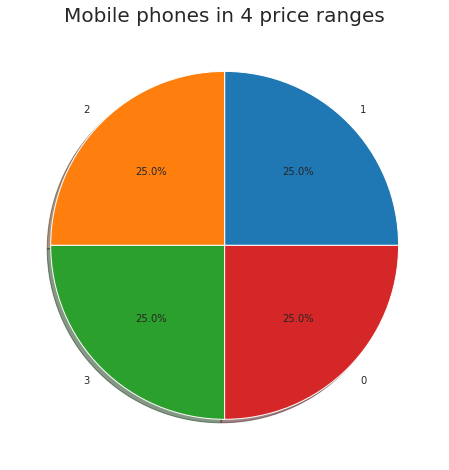

In [ ]:
#Creating a visualisation for the 'price_range' dataframe.
plt.figure(figsize=(10,8))
labels = data['price_range'].value_counts(sort = True).index                 
sizes = data['price_range'].value_counts(sort = True)
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Mobile phones in 4 price ranges',size = 20)
plt.show()                 


There are mobile phones in 4 price ranges. The number of elements is almost similar.

###Analysing for different Ram.

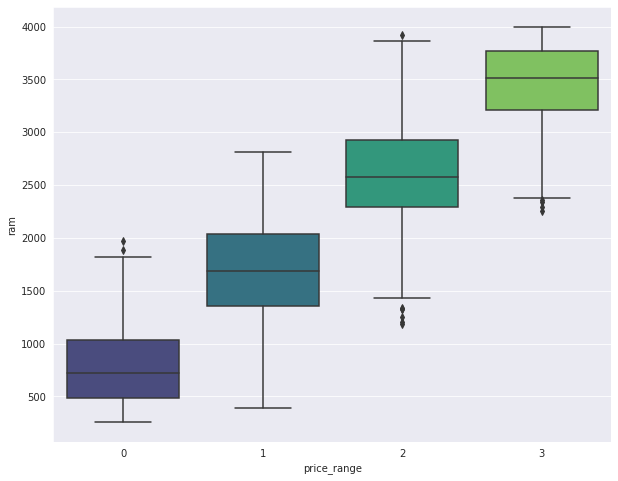

In [ ]:
#Creating a visualisation for the different Ram.
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='ram',  palette= "viridis");

Ram has continuous increase with price range while moving from Low cost to Very high cost.

###Analysing for different Battery power.

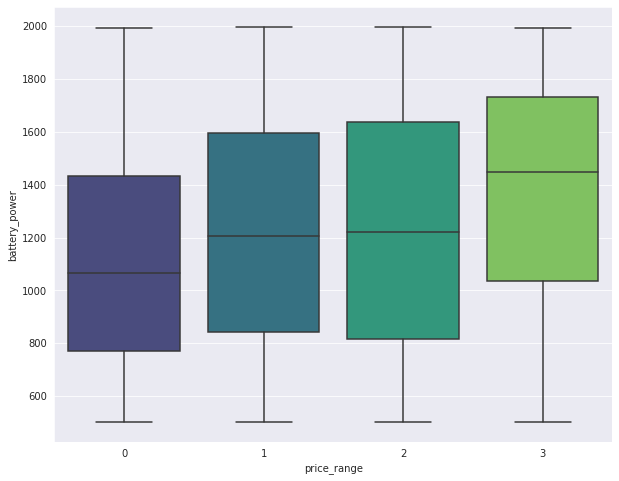

In [ ]:
#Creating a visualisation for the different Battery power.
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='battery_power',  palette= "viridis");

This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases.

###percentage of Phones which support 3G.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


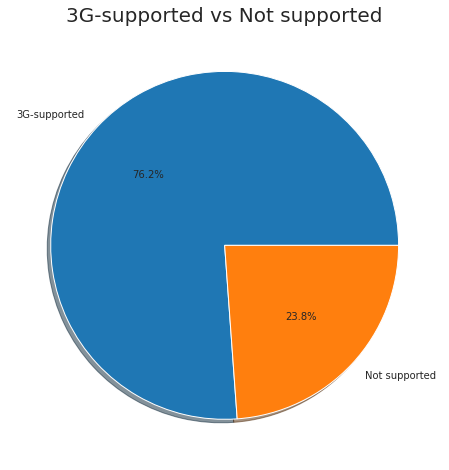

In [ ]:
#visualisation for 3G-supported vs Not supported.
plt.figure(figsize=(10,8))
labels = ["3G-supported",'Not supported']
sizes=data['three_g'].value_counts()
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('3G-supported vs Not supported',size = 20)
plt.show()  



From the above graph, we can see that 76.2% Mobile phones supported 3G system and 23.8% Mobile phones do not supported 3G.

###percentage of Phones which support 4G.

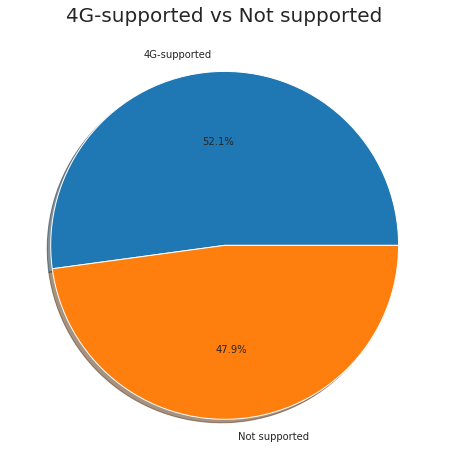

In [ ]:
#visualisation for 4G-supported vs Not supported.
plt.figure(figsize=(10,8))
labels = ["4G-supported",'Not supported']
sizes=data['four_g'].value_counts()
explode = None
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('4G-supported vs Not supported',size = 20)
plt.show() 

From the above graph, we can see that 52.1% Mobile phones supported 4G system and 47.9% Mobile phones do not supported 4G.

###Analysing for different Mobile Weight.

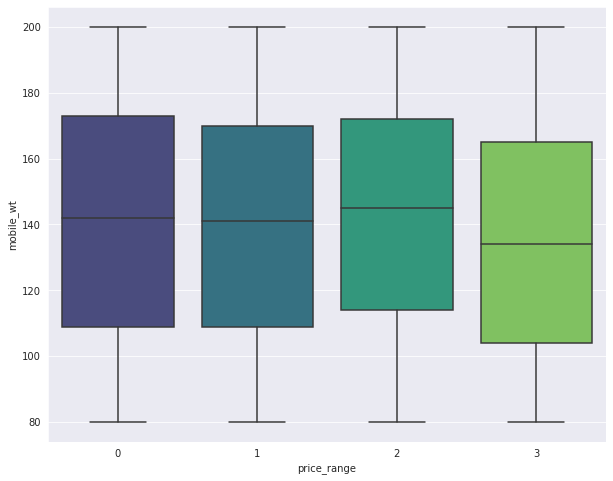

In [ ]:
#Creating a visualisation for the different Mobile Weight.
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='price_range', y='mobile_wt',  palette= "viridis");

As we can see that costly phones are lighter.

###Analysing for Bluetooth with price range.

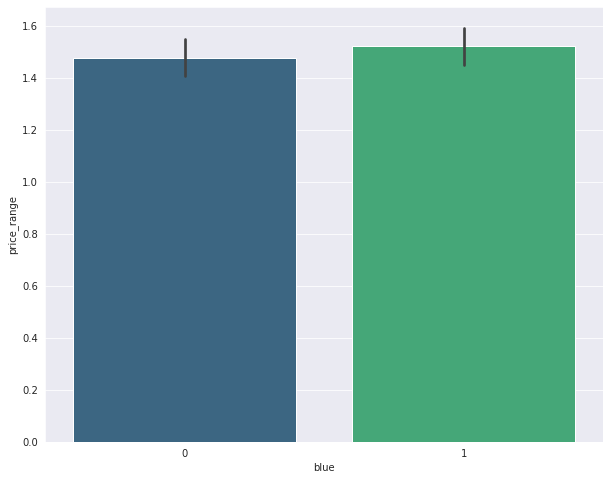

In [ ]:
#Creating a visualisation for the Bluetooth.
plt.figure(figsize=(10,8))
sns.barplot(data = data, x = 'blue', y = 'price_range',  palette= "viridis");

half the devices have Bluetooth, and half don’t.

###Distribution of the Px_Width for different price_range.

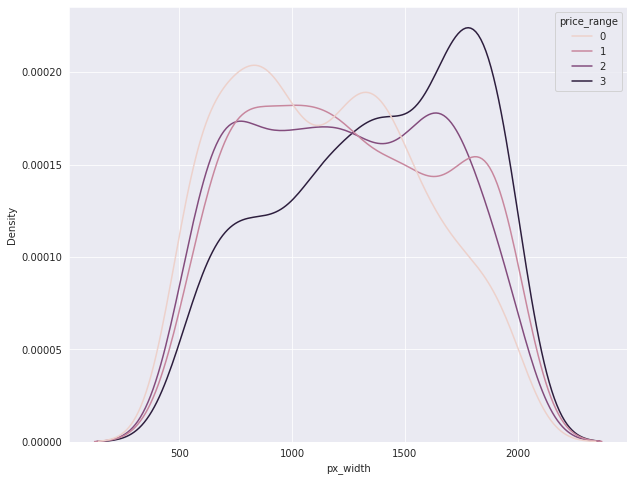

In [ ]:
#Distribution of the Px_Width for different price_range.
plt.figure(figsize=(10,8))
sns.kdeplot(data=data, x='px_width', hue='price_range');

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

###No of Phones vs Camera megapixels of front and primary camera.

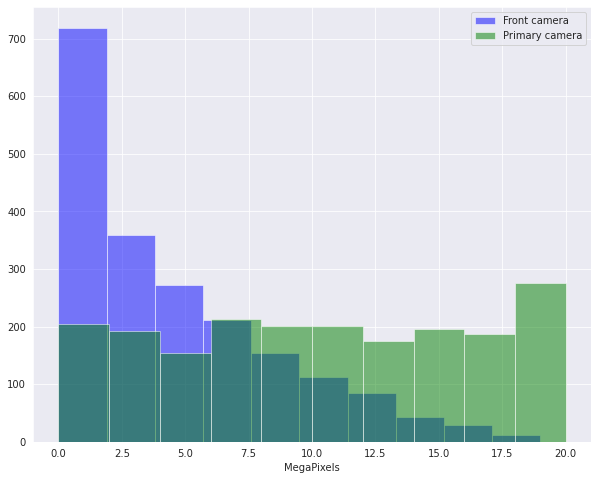

In [ ]:
#Creating a visualisation for No of Phones vs Camera megapixels.
plt.figure(figsize=(10,8))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='green',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels');

From the above graph, we can see that most of the mobile phones have Front camera lies between 0.1 to 2.4 megapixels and Primary camera lies between 18 to 20 megapixels.

###Correlation matrix.

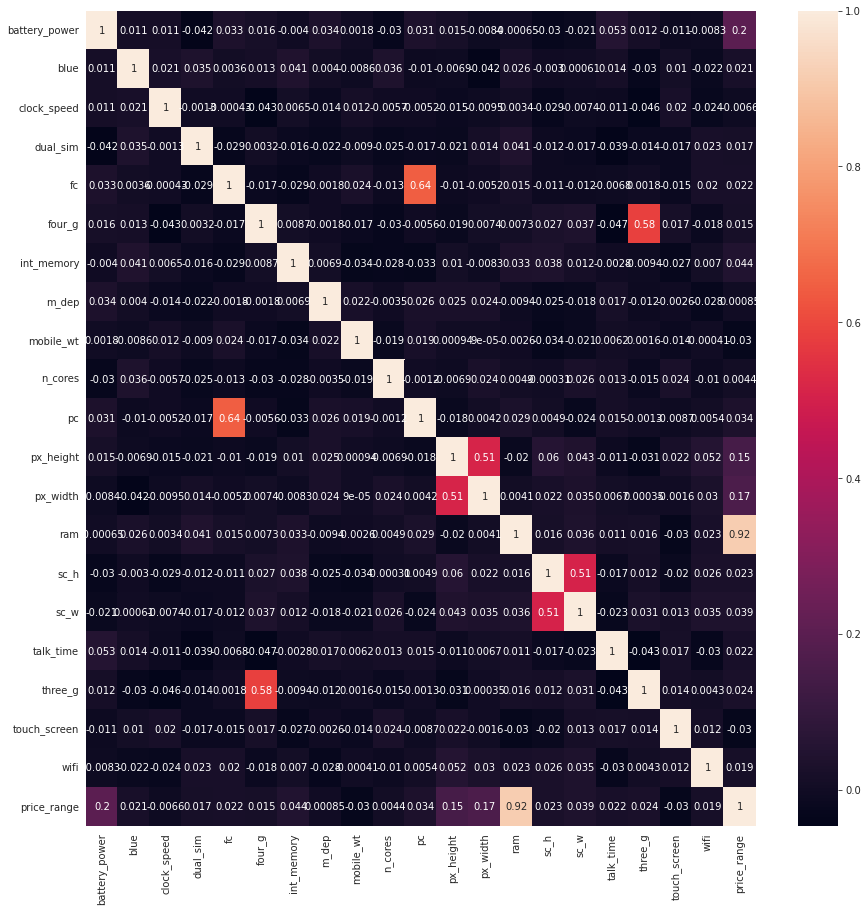

In [ ]:
#Correlation matrix.
corr_df = data.corr()              
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, 
            annot=True);

In [ ]:
#Correlation of 'price_range' with other columns.
corr_df['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

'price_range' has high positive correlation with ram, battery_power, px_width, and px_height. Negative correlation with mobile_wt, touch_screen and clock_speed.

##Creating the test and train dataset

In [ ]:
#Creating the dataset for independent and dependent variables
X = data.drop('price_range',axis=1)
y = data['price_range']

In [ ]:
#Splitting the dataset into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Shape of the train set of the independent values
X_train.shape

(1600, 20)

In [ ]:
#Shape of the test set of the independent values
X_test.shape

(400, 20)

##Feature Scaling

 If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.o. In our data we have used standardization using standard scaler.

In [ ]:
#Creating object for the StandardScaler function
sc = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-1.3795348 ,  1.01892912,  0.83711156, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-0.01091435, -0.98142253, -0.74838475, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       [ 1.55743843, -0.98142253, -0.74838475, ..., -1.79489161,
         0.9900495 ,  1.00250313],
       [-1.37499543,  1.01892912, -1.11426851, ...,  0.55713671,
        -1.0100505 , -0.99750312]])

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_test

array([[ 0.95995168, -1.02532046,  1.18183156, ...,  0.56965192,
         1.0100505 , -1.08347268],
       [-0.10911252, -1.02532046, -1.32403976, ...,  0.56965192,
        -0.9900495 , -1.08347268],
       [ 1.71106143, -1.02532046,  1.68300583, ...,  0.56965192,
         1.0100505 , -1.08347268],
       ...,
       [-0.42706695, -1.02532046,  0.3047766 , ...,  0.56965192,
         1.0100505 ,  0.92295821],
       [-1.15513653, -1.02532046,  1.4324187 , ...,  0.56965192,
         1.0100505 ,  0.92295821],
       [-0.10220046, -1.02532046,  0.43007017, ...,  0.56965192,
         1.0100505 ,  0.92295821]])

##Model Implementation

Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we will be include the following models:

1) Decision Tree.

2) Support Vector Classifier(SVC).

3) Random forest classifier.

4) Logistic regression.

###Decision Tree.

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
#Training the Decision Tree model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train , Y_train)

DecisionTreeClassifier()

In [ ]:
#Predicting the value of the dependent variable for test dataset
pred_dtc = dtc_model.predict(X_test)
pred_dtc

array([0, 2, 2, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 1, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 1,
       3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 0, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 0,
       2, 3, 0, 3, 1, 0, 0, 2, 2, 1, 2, 3, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 0, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 2, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 1, 0, 1, 3, 3,

In [ ]:
#accuracy_score
dtc_acc = accuracy_score(pred_dtc,Y_test)
print(dtc_acc)
#classification_report
report_dtc = classification_report(pred_dtc, Y_test)
print(report_dtc)


0.83
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        99
           1       0.87      0.72      0.79       110
           2       0.71      0.76      0.73        85
           3       0.86      0.91      0.88       106

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



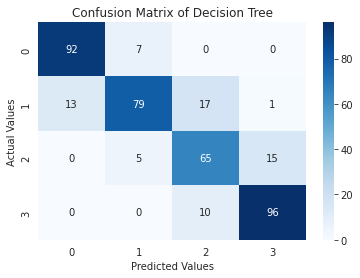

In [ ]:
#Confusion Matrix of Decision Tree
cf_matrix_dtc = confusion_matrix(pred_dtc,Y_test)
sns.heatmap(cf_matrix_dtc, annot=True, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

###Support Vector Classifier(SVC).

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
#Training the support vector classifier(svc) model
svc_model=SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [ ]:
#Predicting the value of the dependent variable for test dataset
pred_svc = svc_model.predict(X_test)
pred_svc

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 1, 3, 2, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 3, 0, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 2, 3, 1, 0, 0, 2, 2, 3, 2, 0, 0, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 3, 1, 2, 0, 0, 0, 2, 0, 1, 3, 1, 0, 2, 2, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 1, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 3, 0, 1, 2,
       2, 2, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 2, 3, 1, 0, 0, 1, 3, 3,

In [ ]:
#accuracy_score
svc_acc = accuracy_score(pred_svc,Y_test)
print(svc_acc)
#classification_report
report_svc = classification_report(pred_svc, Y_test)
print(report_svc)

0.8825
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.89      0.81      0.85       100
           2       0.80      0.82      0.81        90
           3       0.88      0.96      0.92       102

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



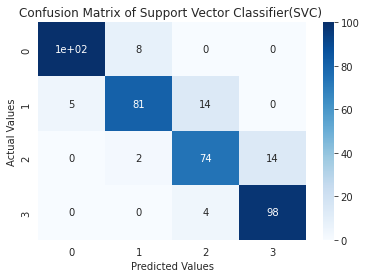

In [ ]:
#Confusion Matrix of Support Vector Classifier(SVC) 
cf_matrix_svc = confusion_matrix(pred_svc,Y_test)
sns.heatmap(cf_matrix_svc, annot=True, cmap='Blues')
plt.title("Confusion Matrix of Support Vector Classifier(SVC) ")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

###Random forest classifier.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [ ]:
#Training the Random forest classifier model
rfc_model = RandomForestClassifier(n_estimators=300)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
#Predicting the value of the dependent variable for test dataset
pred_rfc = rfc_model.predict(X_test)
pred_rfc

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
#accuracy_score
rfc_acc = accuracy_score(pred_rfc,Y_test)
print(rfc_acc)
#classification_report
report_rfc = classification_report(pred_rfc, Y_test)
print(report_rfc)

0.885
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.88      0.83      0.86        96
           2       0.83      0.81      0.82        94
           3       0.88      0.95      0.91       103

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400



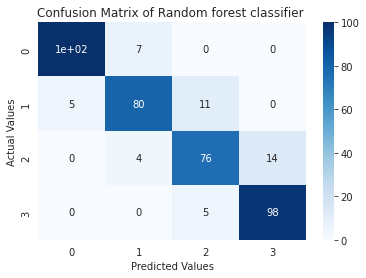

In [ ]:
#Confusion Matrix of Random forest classifier
cf_matrix_rfc = confusion_matrix(pred_rfc,Y_test)
sns.heatmap(cf_matrix_rfc, annot=True, cmap='Blues')
plt.title("Confusion Matrix of Random forest classifier ")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

As we can see there is only a very slight difference between the results achieved through Support Vector Classifier(SVC) and Random forest classifier.

###Logistic regression.

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [ ]:
#Training the logistic regression model
lr_model=LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#Predicting the value of the dependent variable for test dataset
pred_lr = lr_model.predict(X_test)
pred_lr

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 2, 3, 1, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
#accuracy_score
lr_acc = accuracy_score(pred_lr,Y_test)
print(lr_acc)
#classification_report
report_lr = classification_report(pred_lr, Y_test)
print(report_lr)

0.9525
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       0.98      0.92      0.95        97
           2       0.90      0.91      0.91        91
           3       0.93      0.99      0.96       105

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



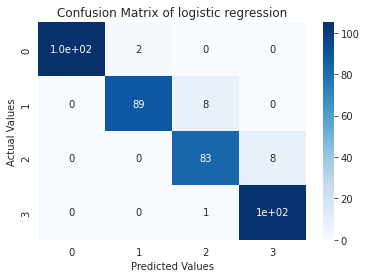

In [ ]:
#Confusion Matrix of logistic regression
cf_matrix_lr = confusion_matrix(pred_lr,Y_test)
sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues')
plt.title("Confusion Matrix of logistic regression")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

As we can see the quality of model prediction has drastically improved, it means logistic Regression is the best performing model with an  accuracy_score of 0.9525.

##Model Explainability

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

In [ ]:
#Installing the shap library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.5 MB/s eta 0:00:00


In [ ]:
#Importing the library
import shap

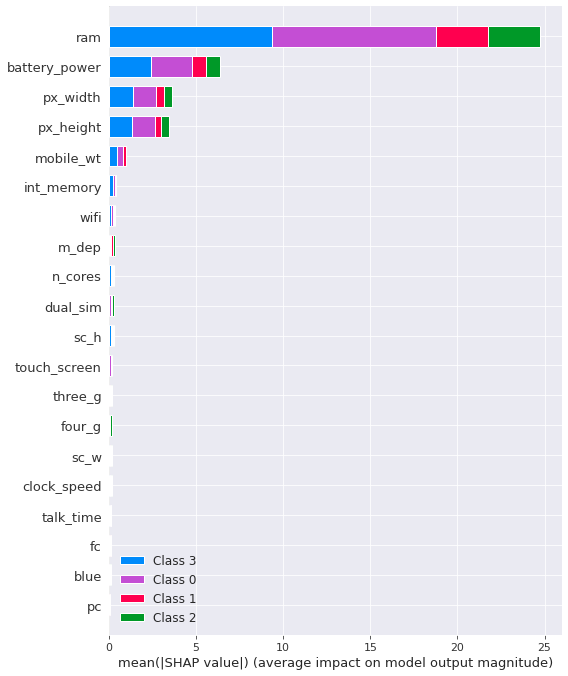

In [ ]:
#Plotting shap summary plot for logistic regression  model
explainer_shap = shap.Explainer(model=lr_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

In [ ]:
#Decision Tree.
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':dtc_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.620961
1,battery_power,0.128576
2,px_height,0.084933
3,px_width,0.065232
4,mobile_wt,0.016659


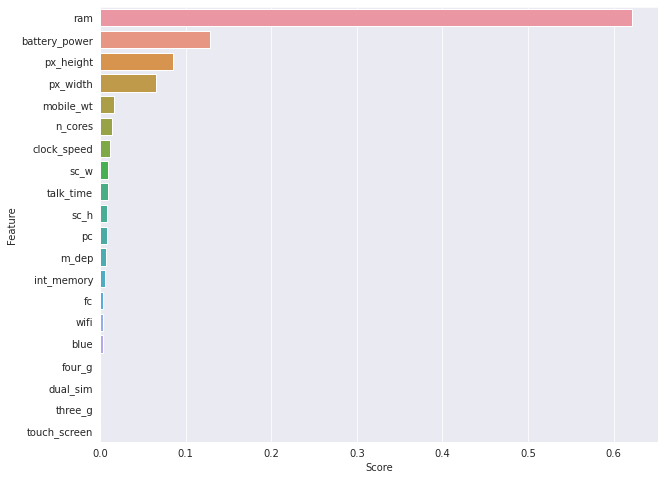

In [ ]:
#Plotting shap summary plot for Decision Tree.
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

In [ ]:
#Random forest classifier.
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rfc_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.471906
1,battery_power,0.075114
2,px_width,0.056725
3,px_height,0.056281
4,mobile_wt,0.040399


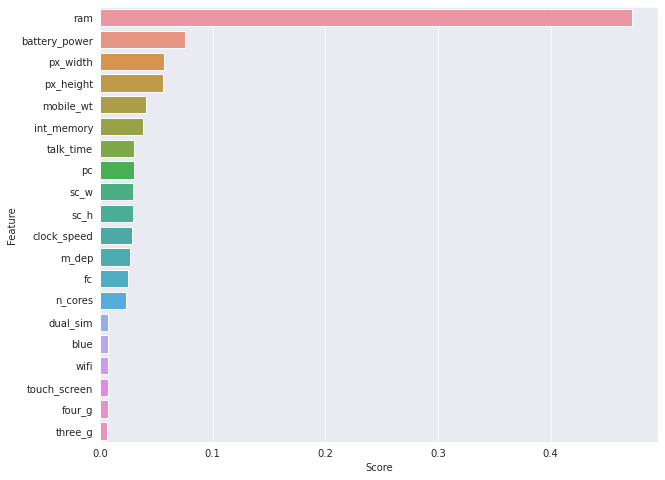

In [ ]:
#Plotting shap summary plot for Random forest classifier.
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. ram, battery_power, px_height and px_width are the most important factors according to all the models.

##Conclusion



Starting with loading the data so far we have done EDA, there are mobile phones in 4 price ranges and The number of elements is almost similar. Ram and Battery power have continuous increase with price range. 52.1% Mobile phones supported 4G system and 47.9% Mobile phones do not supported 4G. Costly phones are lighter,half the devices have Bluetooth, and half don’t. Most of the mobile phones have Front camera that lies between 0.1 to 2.4 megapixels and Primary camera lies between 18 to 20 megapixels.

**Results from ML models:**

* Logistic Regression is the best performing model with an accuracy score of 
0.9525. 
* Decision Tree is the worst performing model with an accuracy score of 
0.8275.
* Ram, Battery_Power, Px_height and Px_width are the most important factors according to all the models.

